In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [7]:
df = pd.read_csv("acceleration_data.csv")
N = len(df)
fs = 200
T = 1 / fs
df['t'] = np.arange(0, N/fs, T)
df

,ax,ay,az,t
0,0.0947,-0.0176,0.9746,0.000
1,0.1016,-0.0232,0.9787,0.005
2,0.0947,-0.0178,0.9799,0.010
3,0.0955,-0.0208,0.9768,0.015
4,0.0959,-0.0210,0.9740,0.020
...,...,...,...,...
32595,0.0955,-0.0205,0.9758,162.975
32596,0.0950,-0.0295,0.9743,162.980
32597,0.0945,-0.0249,0.9764,162.985
32598,0.0962,-0.0208,0.9796,162.990


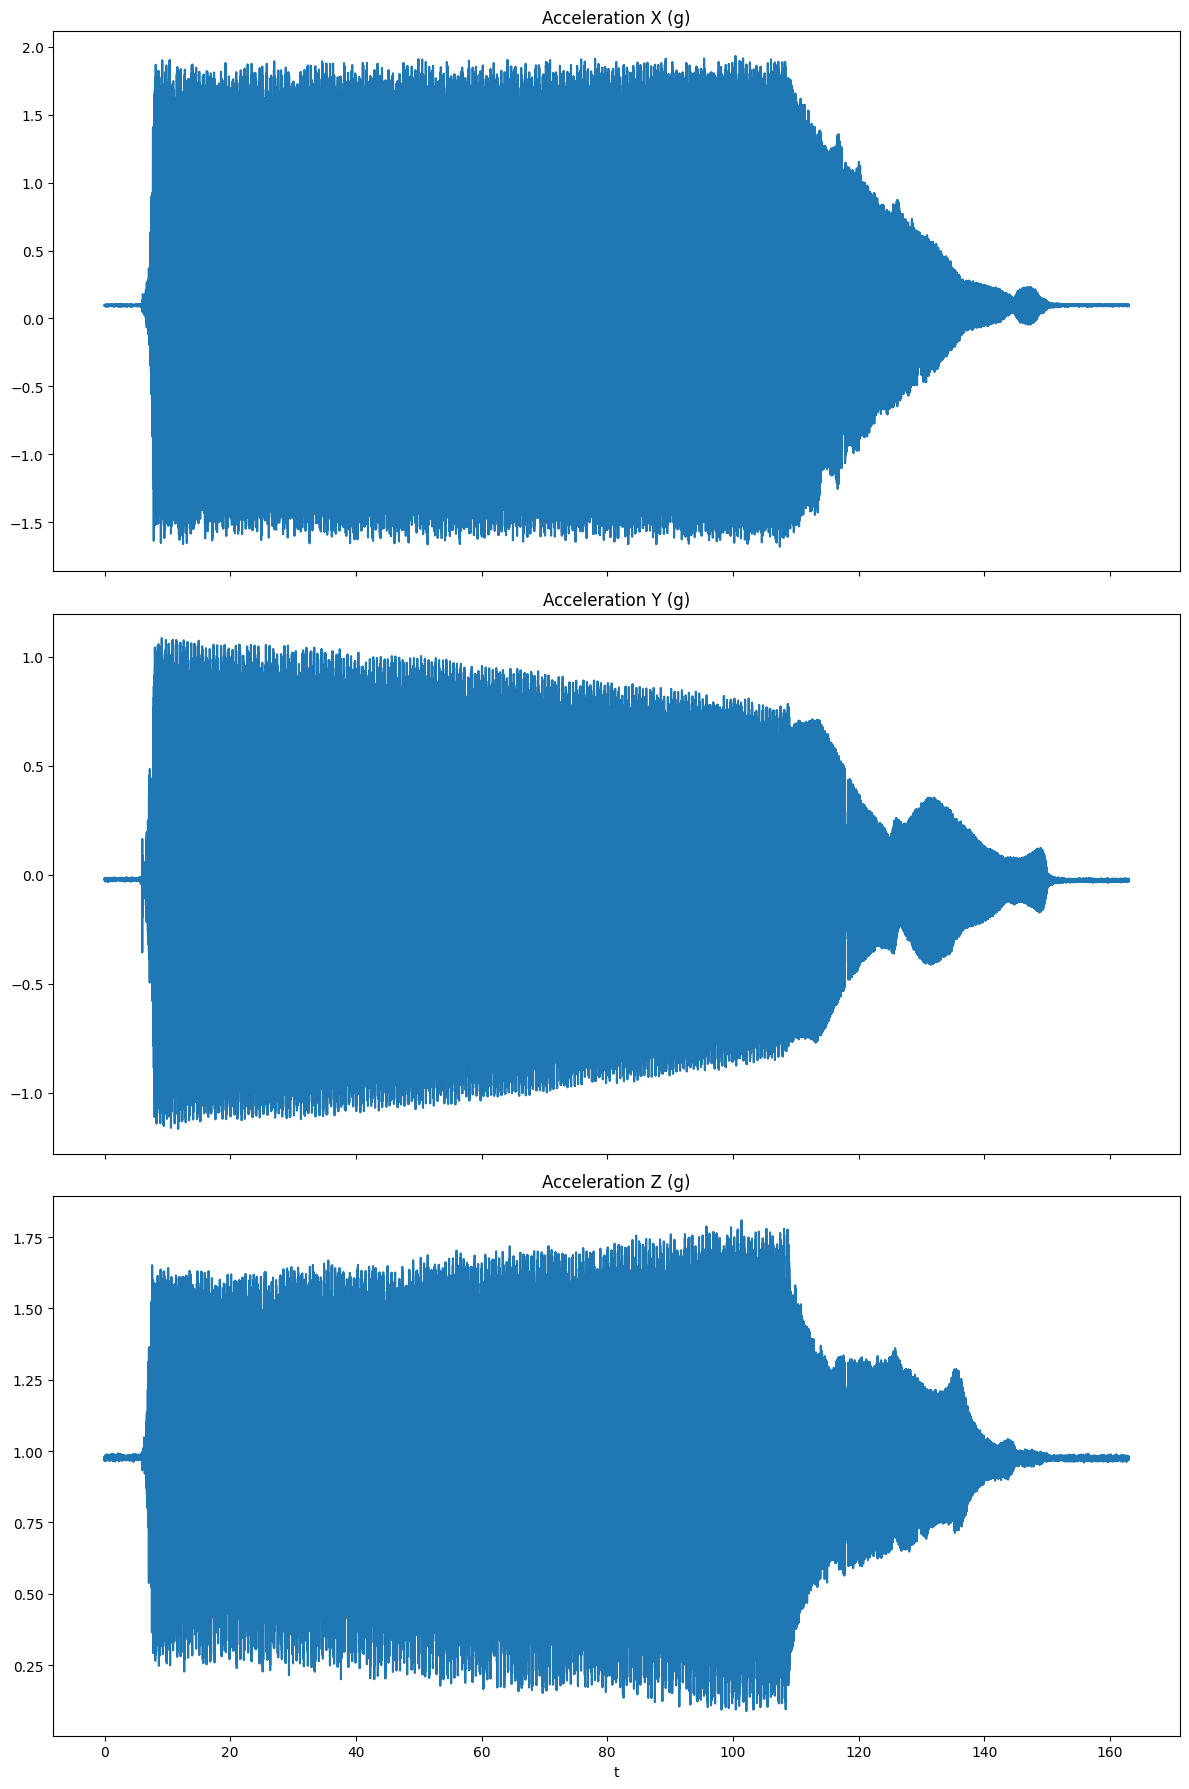

In [8]:
fig, axes = plt.subplots(3, 1, figsize=(12, 18), sharex=True)

df.plot(x='t', y='ax', ax=axes[0], title='Acceleration X (g)', legend=False)
df.plot(x='t', y='ay', ax=axes[1], title='Acceleration Y (g)', legend=False)
df.plot(x='t', y='az', ax=axes[2], title='Acceleration Z (g)', legend=False)

plt.tight_layout()
plt.show()

Text(0, 0.5, 'Amplitude')

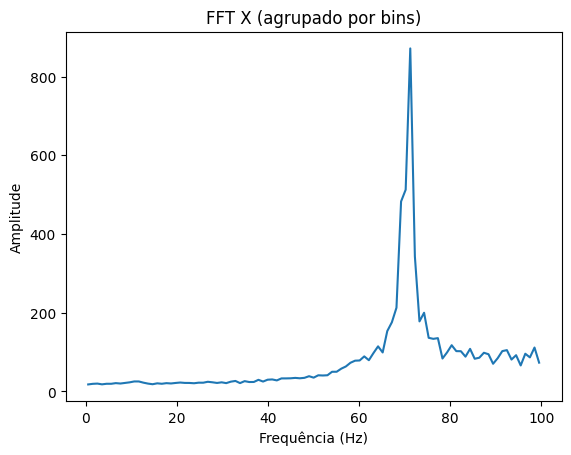

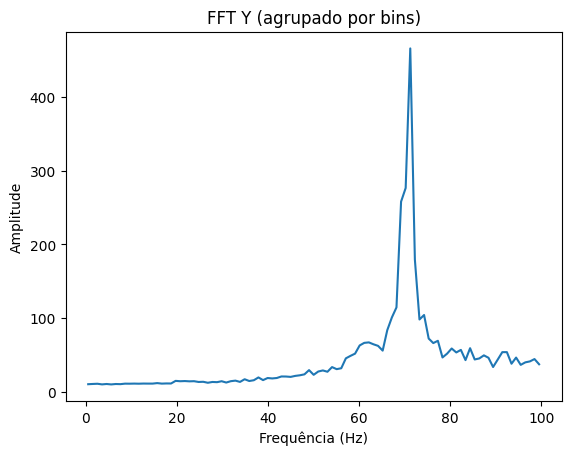

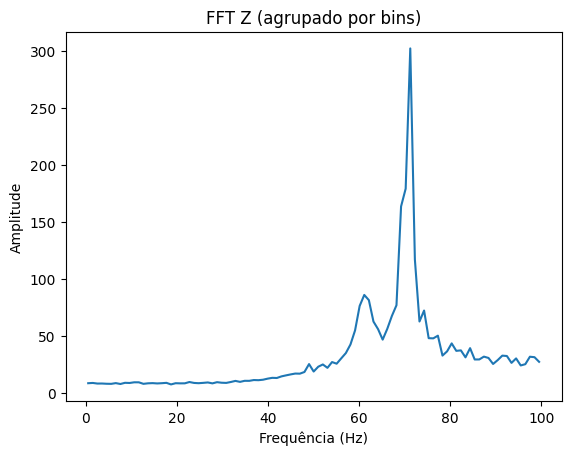

In [13]:
f = np.fft.fftfreq(N, T)
fft_x = np.fft.fft(df['ax'])
fft_x_mag = np.abs(fft_x)
fft_y = np.fft.fft(df['ay'])
fft_y_mag = np.abs(fft_y)
fft_z = np.fft.fft(df['az'])
fft_z_mag = np.abs(fft_z)

# Definir os bins
bins = np.linspace(0, fs / 2, 100)  # Dividindo a frequência em 100 bins
bin_centers = 0.5 * (bins[1:] + bins[:-1])

# Agrupar e calcular a média para fft_x
fft_x_binned = np.histogram(f[f > 0], bins=bins, weights=fft_x_mag[f > 0])[0] / np.histogram(f[f > 0], bins=bins)[0]

# Agrupar e calcular a média para fft_y
fft_y_binned = np.histogram(f[f > 0], bins=bins, weights=fft_y_mag[f > 0])[0] / np.histogram(f[f > 0], bins=bins)[0]

# Agrupar e calcular a média para fft_z
fft_z_binned = np.histogram(f[f > 0], bins=bins, weights=fft_z_mag[f > 0])[0] / np.histogram(f[f > 0], bins=bins)[0]

# Plotar os gráficos
plt.figure()
plt.plot(bin_centers, fft_x_binned)
plt.title("FFT X (agrupado por bins)")
plt.xlabel("Frequência (Hz)")
plt.ylabel("Amplitude")

plt.figure()
plt.plot(bin_centers, fft_y_binned)
plt.title("FFT Y (agrupado por bins)")
plt.xlabel("Frequência (Hz)")
plt.ylabel("Amplitude")

plt.figure()
plt.plot(bin_centers, fft_z_binned)
plt.title("FFT Z (agrupado por bins)")
plt.xlabel("Frequência (Hz)")
plt.ylabel("Amplitude")



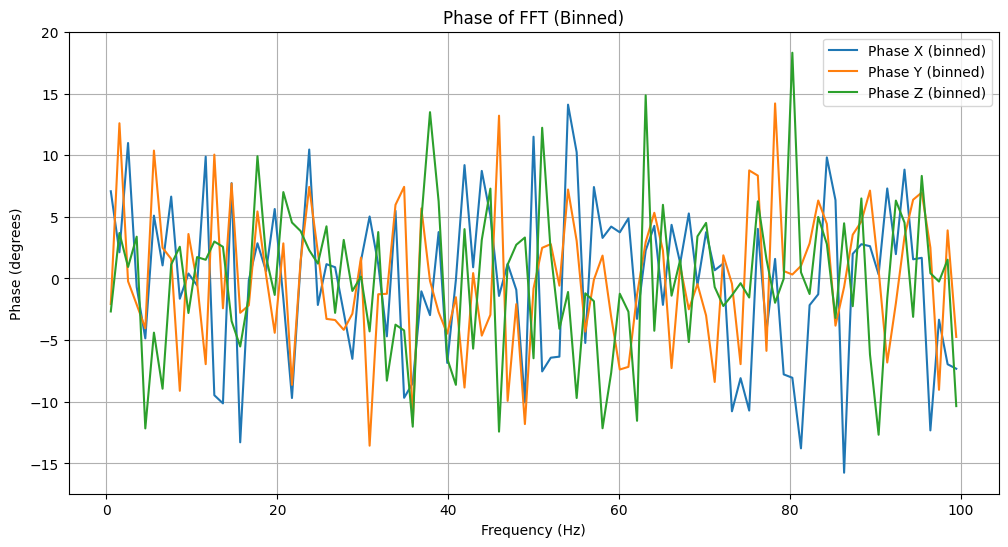

In [21]:
# Calculate the phase of the FFT for each axis
phase_x = np.angle(fft_x)
phase_y = np.angle(fft_y)
phase_z = np.angle(fft_z)

# Calculate the phase of the FFT for each axis in degrees
phase_x_deg = np.degrees(phase_x)
phase_y_deg = np.degrees(phase_y)
phase_z_deg = np.degrees(phase_z)

# Agrupar e calcular a média da fase em graus para phase_x
phase_x_binned = np.histogram(f[f > 0], bins=bins, weights=phase_x_deg[f > 0])[0] / np.histogram(f[f > 0], bins=bins)[0]

# Agrupar e calcular a média da fase em graus para phase_y
phase_y_binned = np.histogram(f[f > 0], bins=bins, weights=phase_y_deg[f > 0])[0] / np.histogram(f[f > 0], bins=bins)[0]

# Agrupar e calcular a média da fase em graus para phase_z
phase_z_binned = np.histogram(f[f > 0], bins=bins, weights=phase_z_deg[f > 0])[0] / np.histogram(f[f > 0], bins=bins)[0]

# Plotar os gráficos
plt.figure(figsize=(12, 6))
plt.plot(bin_centers, phase_x_binned, label='Phase X (binned)')
plt.plot(bin_centers, phase_y_binned, label='Phase Y (binned)')
plt.plot(bin_centers, phase_z_binned, label='Phase Z (binned)')
plt.title("Phase of FFT (Binned)")
plt.xlabel("Frequency (Hz)")
plt.ylabel("Phase (degrees)")
plt.legend()
plt.grid()
plt.show()
